In [1]:
pip install -r requirements.txt

  Using cached numpy-2.2.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached numpy-2.2.1-cp312-cp312-win_amd64.whl (12.6 MB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.0 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 18.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 50.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
print("Hello World!")

Hello World!


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

#test scores
scores = {
    1: 450,
    2: 120,
    3: 890,
    4: 345,
    5: 760,
    6: 230,
    7: 980,
    8: 540,
    9: 670,
    10: 310
}


#function to convert scores to probability
def score_to_prob(scores):
    """
    Converts a dictionary of scores into probabilities by normalizing the values.

    Args:
        scores (dict): Dictionary with keys as IDs and values as scores.

    Returns:
        dict: Dictionary with keys as IDs and values as probabilities.
    """
    prob = {}
    sum_scores = sum(scores.values())
    for key, value in scores.items():
        prob[key] = value / sum_scores
    return (prob)

#function to choose next verb based on scores
def next_verb(scores):
    """
    Simulates verb selection based on scores and plots results against the original scores.

    Args:
        scores (dict): Dictionary with keys as IDs and values as scores.
        n (int): Number of simulation iterations.

    Returns:
        None
    """
    prob = score_to_prob(scores)
    verb_choose = np.random.choice(list(prob.keys()), p=list(prob.values()))
    return (verb_choose)

#function to plot the simulation and comppare with the real data
def simulation_plot_verb(scores, n):
    """
    Plots a simulation of verb selection compared to the original probabilities.

    Args:
        scores (dict): Dictionary where keys are IDs and values are scores.
        n (int): Number of iterations in the simulation.

    Returns:
        None
    """
    count_selections = {}
    for key, value in scores.items():
        count_selections[key] = 0
    for i in range(n):
        verb_choose = next_verb(scores)
        if verb_choose in count_selections:
            count_selections[verb_choose] += 1 
    plt.subplot(1, 2, 1)
    plt.bar(count_selections.keys(), count_selections.values(),
            edgecolor='black', color='skyblue', alpha=0.5)
    plt.title("Simulation")
    plt.xlabel("Verbs key")
    plt.ylabel("Count")
    # Removing uppern and right line
    for pos in ['right', 'top']:
        plt.gca().spines[pos].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.bar(scores.keys(), scores.values(), edgecolor='black', color='skyblue', alpha=0.5)
    plt.title("Probabilities")
    plt.xlabel("Verbs key")
    # Removing uppern and right line
    for pos in ['right', 'top']:
        plt.gca().spines[pos].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Select n verbs for a training session
def verbs_session(scores, n):
    temp_scores = scores.copy()
    selected_verbs = []
    for i in range(n):
        verb_choose = next_verb(temp_scores)
        # print(verb_choose)
        selected_verbs.append(verb_choose)
        del temp_scores[verb_choose]
    return (selected_verbs)

def cor_answer(score):
    return (score * 0.7)

def wr_answer(score, rank, n):
    a1 = 1.2+((n - rank + 1) / (n - 1))
    return (score * a1)

def next_scores(results, scores):
    new_scores = {}
    for key, value in scores.items():
        if results[key] == 1:
            new_scores[key] = cor_answer(value)
        else:
            new_scores[key] = wr_answer(value, key, len(scores))
    return (new_scores)

    


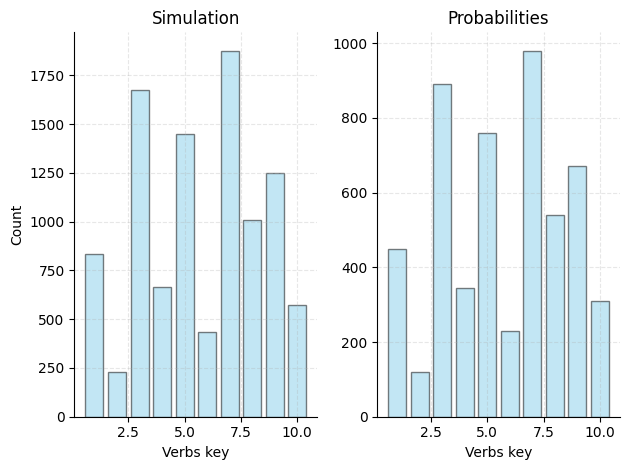

In [20]:
simulation_plot_verb(scores, 10000)

In [16]:
scores1 = {1: 50, 2: 2000, 3: 3000, 4: 100, 5: 5000, 6: 230, 7: 10, 8: 40, 9: 60, 10: 10}
scores2 = {1: 450, 2: 120, 3: 890, 4: 345, 5: 760, 6: 230, 7: 980, 8: 540, 9: 670, 10: 310}


print("umbalanced numbers")
print(sorted(list(map(int, verbs_session(scores1, 3)))))
print(sorted(list(map(int, verbs_session(scores1, 3)))))
print(sorted(list(map(int, verbs_session(scores1, 3)))))
print(sorted(list(map(int, verbs_session(scores1, 3)))))
print(sorted(list(map(int, verbs_session(scores1, 3)))))

print("balanced numbers")
print(sorted(list(map(int, verbs_session(scores2, 3)))))
print(sorted(list(map(int, verbs_session(scores2, 3)))))
print(sorted(list(map(int, verbs_session(scores2, 3)))))
print(sorted(list(map(int, verbs_session(scores2, 3)))))
print(sorted(list(map(int, verbs_session(scores2, 3)))))



umbalanced numbers
[2, 3, 5]
[2, 3, 5]
[2, 3, 5]
[2, 3, 5]
[2, 3, 5]
balanced numbers
[5, 7, 9]
[3, 5, 7]
[2, 9, 10]
[5, 7, 8]
[4, 7, 9]


700.0
2201.001001001001
1801.6016016016017
1202.002002002002


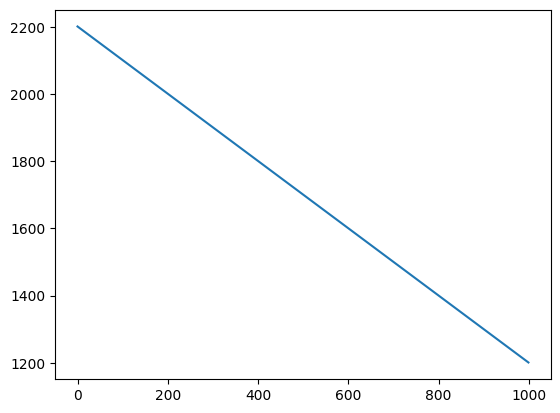

In [21]:
print(cor_answer(1000))
print(wr_answer(1000, 1, 1000))
print(wr_answer(1000, 400, 1000))
print(wr_answer(1000, 999, 1000))

answrs = []
for i in range(1, 1001):
    answrs.append(wr_answer(1000, i, 1000))
plt.plot(answrs)
plt.show()

In [25]:
ex_scores = {1: 450, 2: 120, 3: 890, 4: 345, 5: 760, 6: 230, 7: 980, 8: 540, 9: 670, 10: 310}
ex_results = {1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 1, 9: 1, 10: 0}

new_results = next_scores(ex_results, ex_scores)
print(new_results)

{1: 315.0, 2: 264.0, 3: 623.0, 4: 682.3333333333334, 5: 532.0, 6: 403.77777777777777, 7: 686.0, 8: 378.0, 9: 468.99999999999994, 10: 406.44444444444446}


In [10]:
scores_iniciales = {
    1: 1000,
    2: 1000,
    3: 1000,
    4: 1000,
    5: 1000,
    6: 1000,
    7: 1000,
    8: 1000,
    9: 1000,
    10: 1000
}
# tener una función que analice cuando el score_prom > 650

intentos = [1,5,10,20,50,100]
tasa_prob = [0,25,50,75,100]

def simulacion(scores_iniciales: dict, intentos: list, tasa_prob: list) -> dict:
    for i in len(intentos):
        for j in len(tasa_prob):
            for k in intentos[i]:

[np.int64(1), np.int64(4), np.int64(2), np.int64(6), np.int64(8)]

In [151]:
INITIAL_VALUES = {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0}
INITIAL_N_VERBS = 10

base_scores = {id:INITIAL_VALUES.copy() for id in range(1, INITIAL_N_VERBS + 1)}

base_scores

{1: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 2: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 3: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 4: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 5: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 6: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 7: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 8: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 9: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 10: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0}}

In [152]:
N_VERBS = 1000
def wrong_answer(scores, index):
    mult = 1.2 + ((N_VERBS - index + 1) / (N_VERBS - 1))
    scores[index]['score'] *= mult
    scores[index]['streak'] = 1
    if (scores[index]['score'] > 10**5):
        scores[index]['score'] = 10**5

#wrong_answer(base_scores, 1)
base_scores

{1: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 2: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 3: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 4: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 5: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 6: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 7: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 8: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 9: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 10: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0}}

In [97]:
def right_answer(scores, index):
    scores[index]['score'] = scores[index]['score'] * (0.7 ** scores[index]['streak'])
    scores[index]['streak'] += 1
    if (scores[index]['score'] < 1):
        scores[index]['score'] = 1


right_answer(base_scores, 1)
base_scores

{1: {'score': 1, 'streak': 12, 'right_count': 0, 'wrong_count': 0},
 2: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 3: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 4: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 5: {'score': 117.64899999999996,
  'streak': 4,
  'right_count': 0,
  'wrong_count': 0},
 6: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 7: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 8: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 9: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0},
 10: {'score': 1000, 'streak': 1, 'right_count': 0, 'wrong_count': 0}}

In [153]:
def hint_answer(scores, index, n_hint, len_verb):
    base_right_answer = (0.7 ** scores[index]['streak'])
    base_right_answer = 1 - base_right_answer
    if (n_hint >= len_verb/2):
        wr_answer(scores, index)
        return
    elif (n_hint > 3 & n_hint < len_verb/2):
        base_right_answer = 1
    else:
        base_right_answer = base_right_answer * (1 - (n_hint * (1/4)))
        base_right_answer = 1 - base_right_answer
    scores[index]['score'] = scores[index]['score'] * base_right_answer
    if (scores[index]['score'] < 1):
        scores[index]['score'] = 1
    scores[index]['streak'] = 1
hint_answer(base_scores, 1, 1, len("Pouvoir"))
hint_answer(base_scores, 2, 2, len("Pouvoir"))
hint_answer(base_scores, 3, 3, len("Pouvoir"))
hint_answer(base_scores, 4, 4, len("Pouvoir"))
base_scores

NameError: name 'wr_answer' is not defined

In [ ]:
def next_scores(scores, index, response):
    if (response == 1):
        right_answer(scores, index)
        return (0)
    elif (response == 0):
        wr_answer(scores, index)
        return (0)
    else:
        return(-1)
